In [1]:
import keras
from keras.layers import *
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

In [3]:
(X_train, _), (_, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

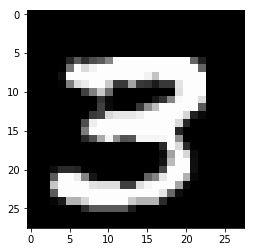

In [5]:
plt.imshow(X_train[111])
plt.show()

In [6]:
# Normalise data between -1 and 1


X_train = (X_train.astype('float32') - 127.5)/127.5
print(X_train.min())
print(X_train.max())
print(X_train.shape)

-1.0
1.0
(60000, 28, 28)


In [0]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = X_train.shape[0]//BATCH_SIZE
HALF_BATCH = 128
NOISE_DIM = 100     #Upsample this vector in 784 
adam = Adam(lr=2e-4,beta_1=0.5)

In [8]:
# Generator -> Upsampling
# Input dim = 100 output is 784 dimn for (28,28) image

generator = Sequential()
generator.add(Dense(256, input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

generator.compile(loss="binary_crossentropy", optimizer=adam)
generator.summary()

W0731 16:31:36.802031 140218441783168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 16:31:36.807015 140218441783168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 16:31:36.811002 140218441783168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 16:31:36.882985 140218441783168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0731 16:31:36.892695 140218441783168 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [9]:
#  Discriminator -> Downsampling
#  Take 786 input and outputs the probabilty for 1 (real image) and 0 (fake image) 

discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid' ))

# why we are giving loss as binary crossentropy in this?
discriminator.compile(loss="binary_crossentropy", optimizer=adam)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total para

In [0]:
#  Create GAN (Step -2)

discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generate_img = generator(gan_input)
gan_output = discriminator(generate_img)


# Keras Functional API for combining both models

model = Model(inputs= gan_input, outputs = gan_output)
model.compile(loss="binary_crossentropy", optimizer=adam)

In [11]:
X_train = X_train.reshape(-1,784)
print(X_train.shape)

(60000, 784)


In [0]:
def save_images(epoch, samples=100):
  noise = np.random.normal(0, 1, size=(samples, NOISE_DIM))
  generated_img = generator.predict(noise)
  generated_img = generated_img.reshape(-1,28,28)
  
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_img[i], interpolation='nearest')
    plt.axis("off")
  
  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()

Epoch 23 Disc Loss 0.6489 Generator Loss 1.0560
Epoch 24 Disc Loss 0.6497 Generator Loss 1.0462
Epoch 25 Disc Loss 0.6521 Generator Loss 1.0497


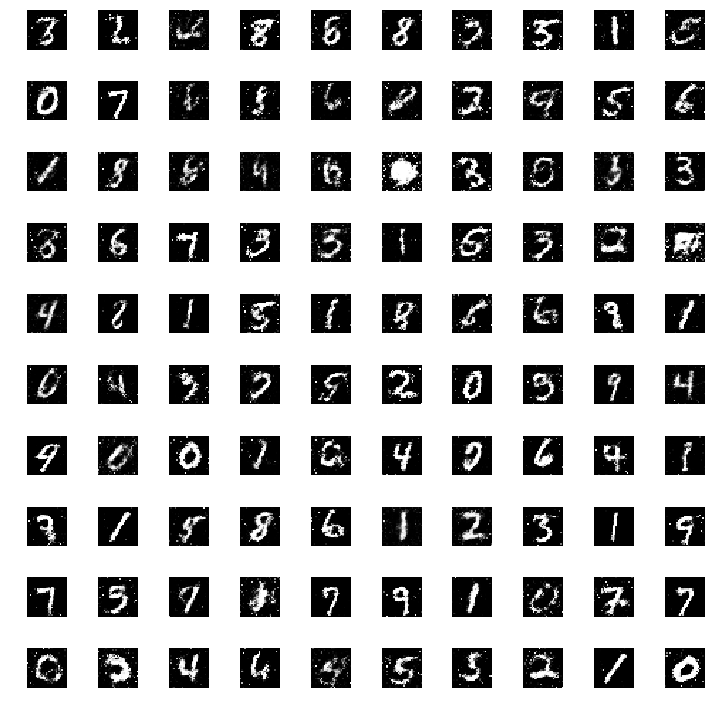

Epoch 26 Disc Loss 0.6513 Generator Loss 1.0454
Epoch 27 Disc Loss 0.6519 Generator Loss 1.0371
Epoch 28 Disc Loss 0.6511 Generator Loss 1.0395
Epoch 29 Disc Loss 0.6534 Generator Loss 1.0366
Epoch 30 Disc Loss 0.6517 Generator Loss 1.0386


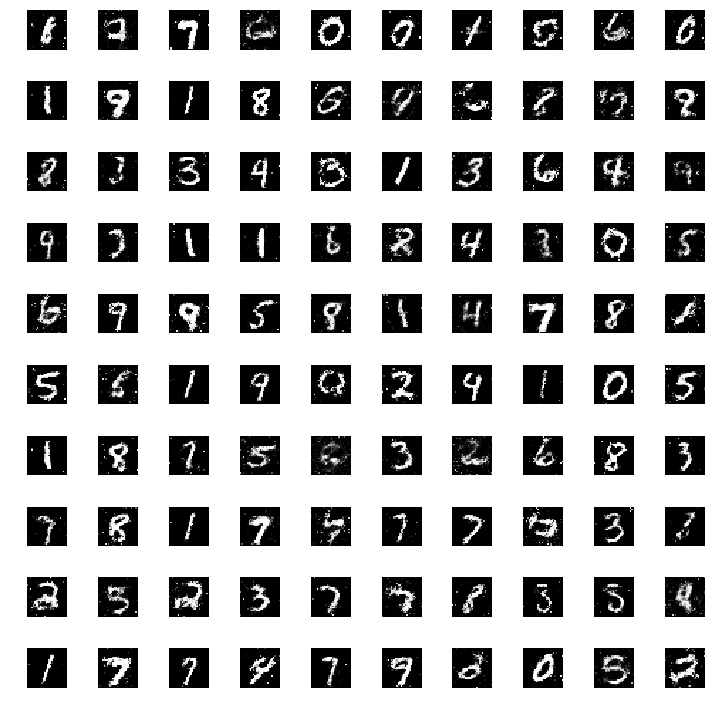

Epoch 31 Disc Loss 0.6523 Generator Loss 1.0344
Epoch 32 Disc Loss 0.6500 Generator Loss 1.0401
Epoch 33 Disc Loss 0.6500 Generator Loss 1.0430
Epoch 34 Disc Loss 0.6504 Generator Loss 1.0418
Epoch 35 Disc Loss 0.6520 Generator Loss 1.0351


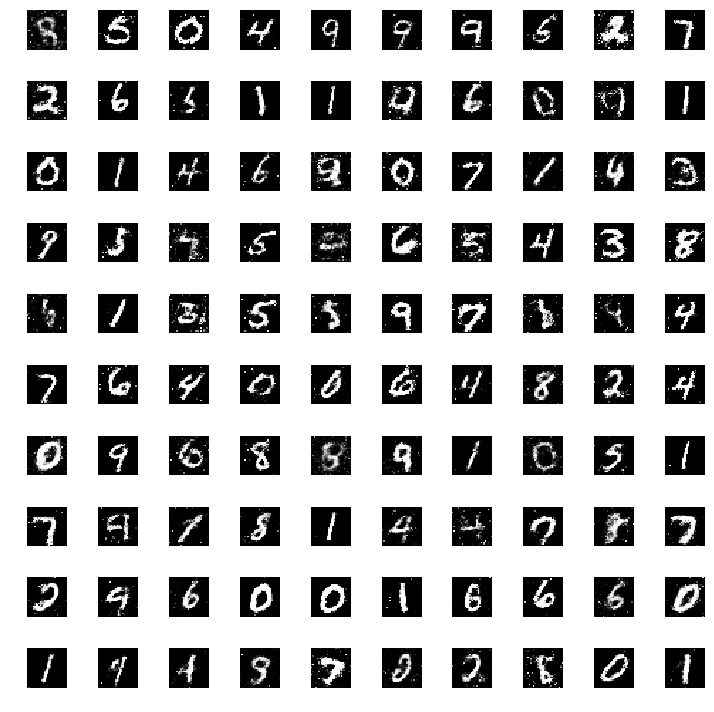

Epoch 36 Disc Loss 0.6507 Generator Loss 1.0385
Epoch 37 Disc Loss 0.6509 Generator Loss 1.0348
Epoch 38 Disc Loss 0.6501 Generator Loss 1.0348
Epoch 39 Disc Loss 0.6503 Generator Loss 1.0398
Epoch 40 Disc Loss 0.6513 Generator Loss 1.0380


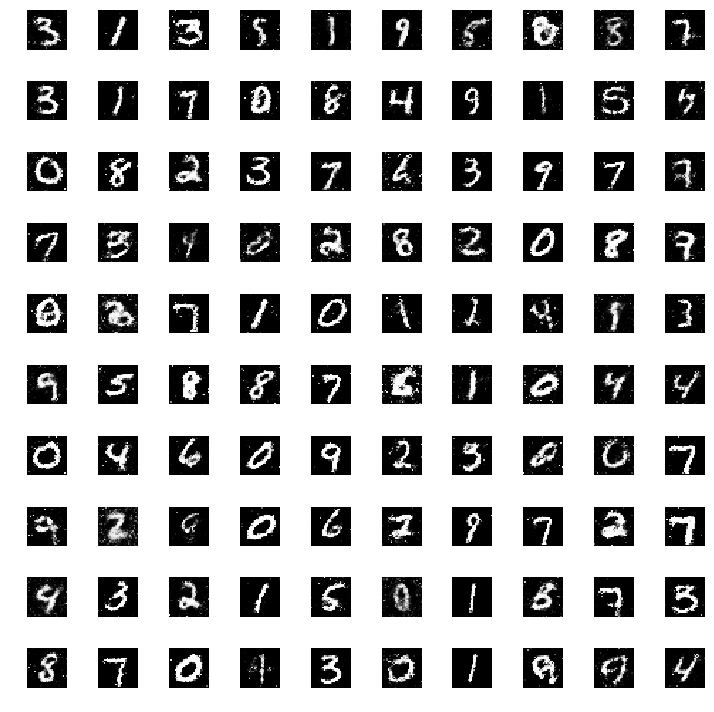

Epoch 41 Disc Loss 0.6489 Generator Loss 1.0425
Epoch 42 Disc Loss 0.6492 Generator Loss 1.0392
Epoch 43 Disc Loss 0.6501 Generator Loss 1.0399
Epoch 44 Disc Loss 0.6494 Generator Loss 1.0428
Epoch 45 Disc Loss 0.6501 Generator Loss 1.0392


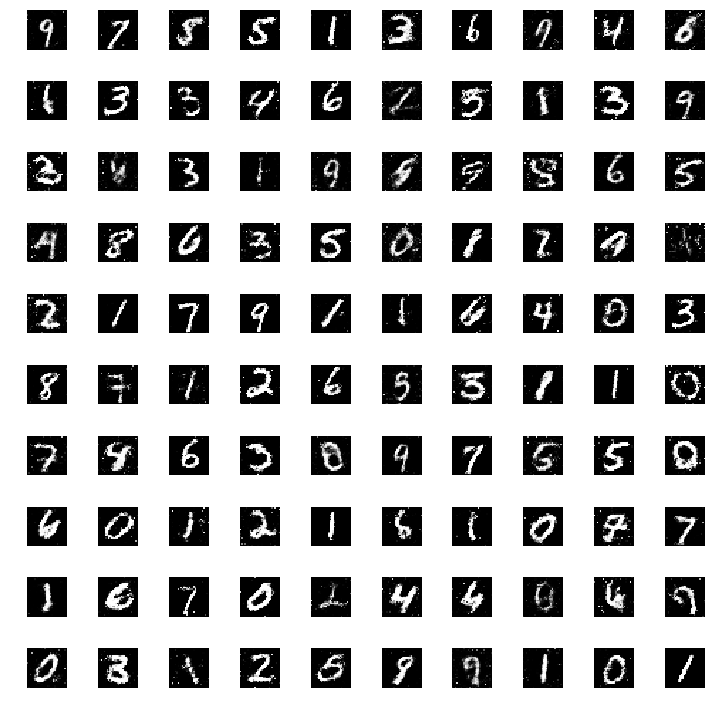

Epoch 46 Disc Loss 0.6512 Generator Loss 1.0353
Epoch 47 Disc Loss 0.6499 Generator Loss 1.0308
Epoch 48 Disc Loss 0.6492 Generator Loss 1.0408
Epoch 49 Disc Loss 0.6504 Generator Loss 1.0332
Epoch 50 Disc Loss 0.6493 Generator Loss 1.0389


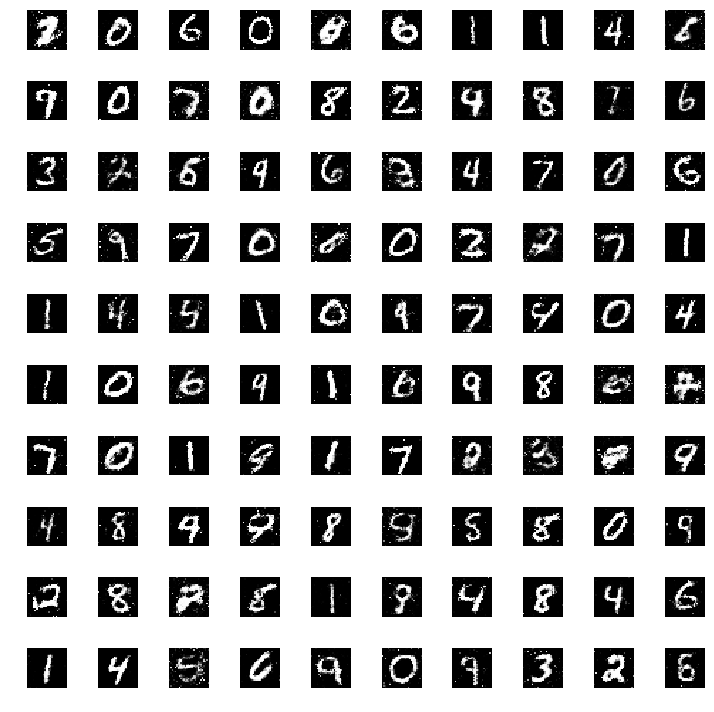

In [15]:
# Training GAN 

discriminator_losses = []
generator_losses = []

for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss = 0.
  epoch_g_loss = 0.
  
  # Mini Batch SGD
  for batch in range(NO_OF_BATCHES):
    
    # Step 1 Train Discriminator
    # 50% Real Data + 50% Fake Data
    
    # Real Data X
    idx = np.random.randint(0,X_train.shape[0],HALF_BATCH)
    real_imgs = X_train[idx]
    
    # Fake Data X
    noise = np.random.normal(0,1, size=(HALF_BATCH,NOISE_DIM))
    fake_imgs = generator.predict(noise) # Forward Pass
    
    # Labels
    real_y = np.ones((HALF_BATCH,1))*0.9 #One side Label Smoothing for Discriminator
    fake_y = np.zeros((HALF_BATCH,1))
    
    
    # Train Discriminator
    
    d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
    
    epoch_d_loss += d_loss
    
    
    
    
    
    # Step 2 Train Generator
    noise = np.random.normal(0, 1, size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))
    g_loss = model.train_on_batch(noise, ground_truth_y)
    
    epoch_g_loss += g_loss
    
    
    
  print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
  discriminator_losses.append(epoch_d_loss)
  generator_losses.append(epoch_g_loss)
  
  if(epoch+1)%5==0:
    generator.save("model/generator_{0}.h5".format(epoch+1))
    save_images(epoch)

In [0]:
# !mkdir images

In [0]:
# !mkdir model

In [0]:
!ls

In [23]:
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_50.png (deflated 8%)
  adding: content/images/gan_output_epoch_35.png (deflated 8%)
  adding: content/images/gan_output_epoch_15.png (deflated 8%)
  adding: content/images/gan_output_epoch_10.png (deflated 8%)
  adding: content/images/gan_output_epoch_45.png (deflated 8%)
  adding: content/images/gan_output_epoch_40.png (deflated 8%)
  adding: content/images/gan_output_epoch_20.png (deflated 8%)
  adding: content/images/gan_output_epoch_25.png (deflated 8%)
  adding: content/images/gan_output_epoch_5.png (deflated 7%)
  adding: content/images/gan_output_epoch_30.png (deflated 8%)


In [28]:
!zip -r /content/model.zip  /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/generator_35.h5 (deflated 8%)
  adding: content/model/generator_5.h5 (deflated 8%)
  adding: content/model/generator_10.h5 (deflated 8%)
  adding: content/model/generator_30.h5 (deflated 8%)
  adding: content/model/generator_20.h5 (deflated 8%)
  adding: content/model/generator_15.h5 (deflated 8%)
  adding: content/model/generator_25.h5 (deflated 8%)
  adding: content/model/generator_40.h5 (deflated 8%)
  adding: content/model/generator_50.h5 (deflated 8%)
  adding: content/model/generator_45.h5 (deflated 8%)


In [30]:
from google.colab import files
files.download('images.zip')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 51896, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil